In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Faculty.csv')

In [3]:
df.head()

,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,EthnicityLabel1,EthnicityLabel2,...,NationalityLabel1,NationalityLabel2,NationalityLabel3,NationalityValue3,NationalityValue2,NationalityValue1,states,public,institute_rank,institution_rank
0,Princeton University,4.7,good,Art History,Al,Acres,NaN,11,White,Black,...,CelticEnglish,"Muslim,Nubian","African,EastAfrican",0.1595,0.2614,0.3219,NJ,False,1,1
1,Princeton University,1.8,poor,Economics,Alicia,Adsera,NaN,3,White,Hispanic,...,"Hispanic,Spanish",CelticEnglish,"European,French",0.0579,0.0695,0.7500,NJ,False,1,1
2,Princeton University,5.0,good,Engineering,Ilhan,Aksay,NaN,1,White,Black,...,"Muslim,Turkic,Turkey","European,German",CelticEnglish,0.0109,0.0593,0.9056,NJ,False,1,1
3,Princeton University,4.5,good,Languages,Kun,An,NaN,2,API,White,...,"EastAsian,Indochina,Vietnam","EastAsian,Malay,Indonesia","European,German",0.0102,0.0227,0.9240,NJ,False,1,1
4,Princeton University,4.8,good,English,Sarah,Anderson,NaN,2,White,Black,...,CelticEnglish,"European,German","European,French",0.0086,0.0122,0.9539,NJ,False,1,1


In [4]:
univ_data = df[['institution_name','public','states']]
univ_data = univ_data.drop_duplicates().reset_index(drop=True)

In [6]:
print("Dimension of Dataset: ",df.shape)
print("\n")
print("Number of Universities: ",df.institution_name.nunique())
print("Number of public universities: ",univ_data.public.value_counts()[0])
print("Number of private universities: ",univ_data.public.value_counts()[1])
print("Number of Departments: ",df.tDept.nunique())
print("Number of States: ",univ_data.states.nunique())
print("\n")
print("Ethnicity Classes: ",df.EthnicityLabel1.nunique(),df.EthnicityLabel1.unique())
print("Nationality Classes: ",df.NationalityLabel1.nunique(),df.NationalityLabel1.unique()[0:3])

Dimension of Dataset:  (209832, 24)


Number of Universities:  102
Number of public universities:  59
Number of private universities:  43
Number of Departments:  1118
Number of States:  32


Ethnicity Classes:  5 ['White' 'API' 'Hispanic' 'Black' 'AIAN']
Nationality Classes:  39 ['CelticEnglish' 'Hispanic,Spanish' 'Muslim,Turkic,Turkey']


# Statewise analysis:

## Ethnicity:

In [7]:
statewise_ethnicities = pd.DataFrame(index=df.EthnicityLabel1.unique())
states_list = list(df.states.unique())
for i in states_list:
    state_data = df[df['states']==i]
    statewise_ethnicities[i] = state_data.EthnicityLabel1.value_counts()
statewise_ethnicities

,NJ,MA,IL,CT,NY,CA,PA,NC,NH,MD,...,WI,WA,UT,SC,MN,CO,IA,DE,OK,VT
White,5371.0,11607,4296.0,2570.0,19707,21778,11743.0,6551.0,238.0,3289.0,...,4728.0,3075,4164,2196.0,4040.0,3753,2409,2792.0,2836.0,1248.0
API,834.0,1127,654.0,379.0,2580,3000,1404.0,542.0,14.0,371.0,...,472.0,474,87,193.0,559.0,276,247,271.0,224.0,63.0
Hispanic,240.0,419,226.0,97.0,808,1428,366.0,275.0,7.0,101.0,...,197.0,119,66,59.0,155.0,186,97,99.0,109.0,35.0
Black,47.0,76,33.0,15.0,160,112,74.0,46.0,1.0,25.0,...,26.0,20,4,10.0,32.0,20,10,22.0,19.0,5.0
AIAN,NaN,2,NaN,NaN,1,2,NaN,NaN,NaN,NaN,...,NaN,1,1,NaN,NaN,1,1,NaN,NaN,NaN


In [10]:
statewise_ethnicities = statewise_ethnicities.iloc[1:]
statewise_ethnicities.describe().round(2)

,NJ,MA,IL,CT,NY,CA,PA,NC,NH,MD,...,WI,WA,UT,SC,MN,CO,IA,DE,OK,VT
count,3.00,4.00,3.00,3.00,4.00,4.0,3.00,3.00,3.00,3.00,...,3.00,4.00,4.00,3.00,3.00,4.00,4.00,3.00,3.00,3.00
mean,373.67,406.00,304.33,163.67,887.25,1135.5,614.67,287.67,7.33,165.67,...,231.67,153.50,39.50,87.33,248.67,120.75,88.75,130.67,117.33,34.33
std,410.17,513.85,317.82,190.94,1181.24,1401.7,699.00,248.24,6.51,181.84,...,225.01,219.84,43.59,94.73,275.70,132.73,114.04,127.48,102.75,29.01
min,47.00,2.00,33.00,15.00,1.00,2.0,74.00,46.00,1.00,25.00,...,26.00,1.00,1.00,10.00,32.00,1.00,1.00,22.00,19.00,5.00
25%,143.50,57.50,129.50,56.00,120.25,84.5,220.00,160.50,4.00,63.00,...,111.50,15.25,3.25,34.50,93.50,15.25,7.75,60.50,64.00,20.00
50%,240.00,247.50,226.00,97.00,484.00,770.0,366.00,275.00,7.00,101.00,...,197.00,69.50,35.00,59.00,155.00,103.00,53.50,99.00,109.00,35.00
75%,537.00,596.00,440.00,238.00,1251.00,1821.0,885.00,408.50,10.50,236.00,...,334.50,207.75,71.25,126.00,357.00,208.50,134.50,185.00,166.50,49.00
max,834.00,1127.00,654.00,379.00,2580.00,3000.0,1404.00,542.00,14.00,371.00,...,472.00,474.00,87.00,193.00,559.00,276.00,247.00,271.00,224.00,63.00


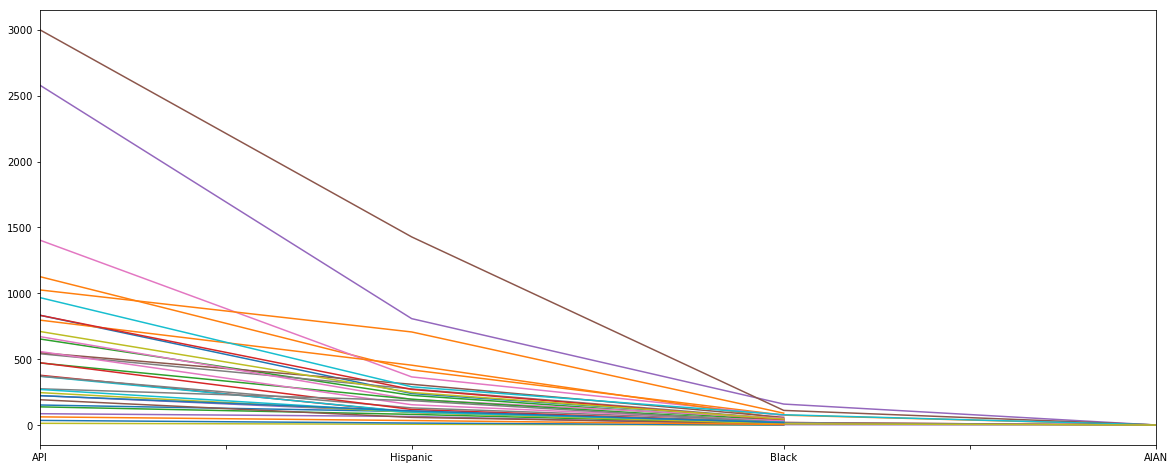

In [15]:
for i in states_list:
    statewise_ethnicities[i].plot(kind='line')
fig = plt.gcf()
fig.set_size_inches(20,8)
plt.show()

## Nationality:

In [127]:
ny = df[df['states']=='NY']
ny.head()

,institution_name,overall_rating,rating_class,tDept,tFname,tLname,tMiddlename,tNumRatings,ethnicity,nationality,public,states
1652,Columbia University,5.0,good,Literature,Jonathan,Abel,NaN,1,White,CelticEnglish,False,NY
1653,Columbia University,5.0,good,Nursing,Sally,Aboelela,NaN,1,White,"Muslim,Nubian",False,NY
1654,Columbia University,NaN,zero,History,Bradley,Abrams,NaN,0,White,CelticEnglish,False,NY
1655,Columbia University,NaN,zero,Finance,Ali,Abuzitiin,NaN,0,White,"Muslim,Persian",False,NY
1656,Columbia University,NaN,zero,Spanish,Santiago,Acosta,NaN,0,Hispanic,"Hispanic,Spanish",False,NY


In [128]:
ny.shape

(21318, 12)

In [129]:
statewise_nationalities = pd.DataFrame(index=df.nationality.unique())
states_list = list(df.states.unique())
for i in states_list:
    state_data = df[df['states']==i]
    statewise_nationalities[i] = state_data.nationality.value_counts()
statewise_nationalities

,NJ,MA,IL,CT,NY,CA,PA,NC,NH,MD,...,WI,WA,UT,SC,MN,CO,IA,DE,OK,VT
CelticEnglish,3213.0,5482.0,2704.0,1480.0,11955.0,13518.0,7785,4445.0,137.0,2047.0,...,3175.0,2044.0,3296.0,1651.0,2678.0,2487.0,1669.0,1937.0,474.0,654.0
"Hispanic,Spanish",388.0,496.0,265.0,118.0,1203.0,1690.0,603,363.0,10.0,172.0,...,291.0,168.0,88.0,99.0,225.0,240.0,121.0,150.0,32.0,40.0
"Muslim,Turkic,Turkey",62.0,82.0,31.0,16.0,198.0,89.0,107,37.0,1.0,26.0,...,29.0,20.0,NaN,9.0,43.0,11.0,12.0,8.0,8.0,3.0
"EastAsian,Indochina,Vietnam",26.0,36.0,22.0,15.0,88.0,165.0,59,22.0,NaN,11.0,...,20.0,20.0,6.0,15.0,18.0,5.0,11.0,11.0,1.0,1.0
"European,French",261.0,478.0,164.0,121.0,956.0,1024.0,542,273.0,5.0,155.0,...,224.0,132.0,88.0,75.0,178.0,140.0,93.0,139.0,21.0,42.0
SouthAsian,330.0,303.0,192.0,97.0,787.0,739.0,431,170.0,4.0,118.0,...,139.0,111.0,13.0,61.0,151.0,77.0,79.0,89.0,20.0,14.0
"Muslim,Pakistanis,Pakistan",16.0,18.0,12.0,6.0,58.0,31.0,15,8.0,NaN,16.0,...,5.0,8.0,NaN,2.0,8.0,7.0,7.0,9.0,1.0,3.0
"Hispanic,Portuguese",133.0,198.0,89.0,58.0,413.0,464.0,222,109.0,2.0,59.0,...,84.0,69.0,48.0,36.0,84.0,76.0,53.0,38.0,11.0,16.0
"European,Russian",64.0,94.0,38.0,30.0,176.0,162.0,125,39.0,3.0,24.0,...,29.0,29.0,4.0,13.0,28.0,17.0,16.0,16.0,3.0,5.0
"European,German",510.0,780.0,478.0,198.0,1918.0,2152.0,1174,591.0,23.0,329.0,...,548.0,304.0,197.0,151.0,444.0,389.0,254.0,264.0,30.0,78.0


In [130]:
statewise_nationalities.describe().round(2)

,NJ,MA,IL,CT,NY,CA,PA,NC,NH,MD,...,WI,WA,UT,SC,MN,CO,IA,DE,OK,VT
count,37.00,36.00,34.00,34.00,36.00,37.00,38.00,33.00,19.00,35.00,...,36.00,35.00,28.00,30.00,35.0,34.00,32.00,33.00,27.00,27.00
mean,166.19,262.25,141.15,75.82,592.17,651.14,341.74,207.76,10.74,101.26,...,146.83,99.80,144.39,78.63,132.0,115.18,82.97,93.06,24.70,34.59
std,528.76,910.65,463.83,253.04,1992.29,2227.05,1262.64,770.87,31.02,345.18,...,530.11,344.63,619.19,299.07,452.0,426.37,293.91,335.84,90.22,124.98
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00
25%,9.00,14.75,14.00,4.00,32.25,31.00,10.50,13.00,1.00,6.50,...,6.75,8.00,3.00,3.00,10.0,6.25,6.00,6.00,2.00,2.00
50%,34.00,42.50,25.00,10.50,83.00,97.00,49.50,24.00,2.00,19.00,...,19.50,15.00,7.00,10.00,25.0,12.00,11.00,11.00,3.00,3.00
75%,75.00,116.75,67.50,39.50,277.25,341.00,128.00,92.00,4.50,50.50,...,58.50,54.50,43.50,34.00,66.0,48.75,41.50,38.00,9.50,15.00
max,3213.00,5482.00,2704.00,1480.00,11955.00,13518.00,7785.00,4445.00,137.00,2047.00,...,3175.00,2044.00,3296.00,1651.00,2678.0,2487.00,1669.00,1937.00,474.00,654.00


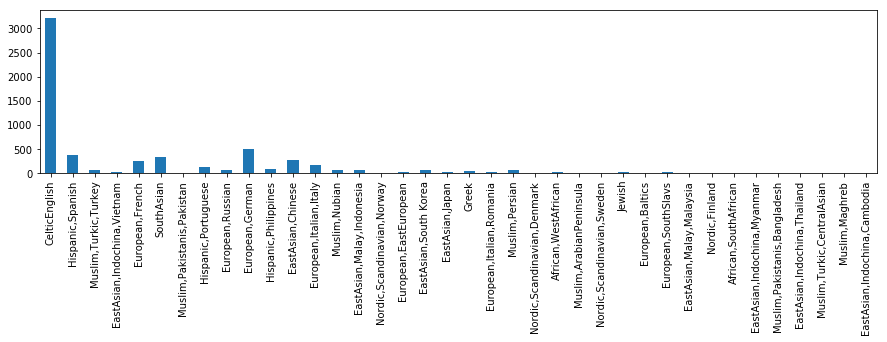

In [131]:
statewise_nationalities.NJ.plot(kind='bar')

fig = plt.gcf()
fig.set_size_inches(15,3)
plt.show()

In [132]:
dept = pd.DataFrame(df.tDept.value_counts())

In [133]:
dept = dept.sort_values(['tDept'],ascending=False)

In [134]:
dept.head(15)

,tDept
English,13390
Mathematics,12091
Engineering,7210
Psychology,6745
Languages,6243
History,6101
Economics,5766
Biology,4865
Chemistry,4679
Political Science,4631


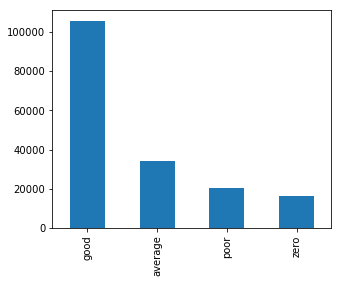

In [135]:
df.rating_class.value_counts().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(5,4)
plt.show()

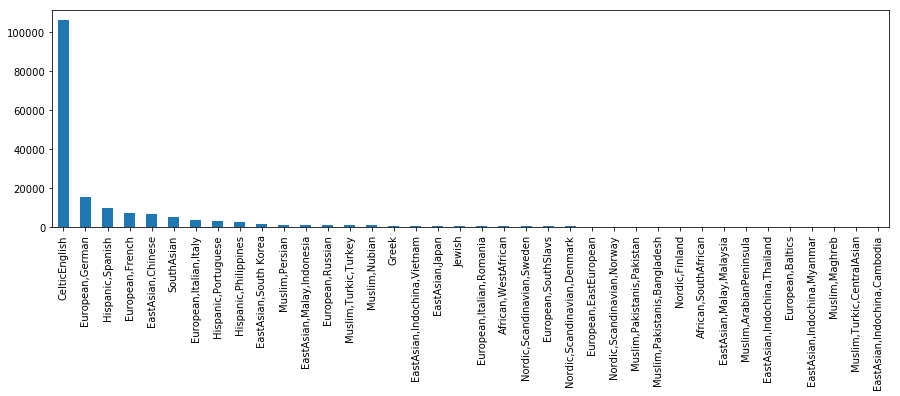

In [136]:
df.nationality.value_counts().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(15,4)
plt.show()

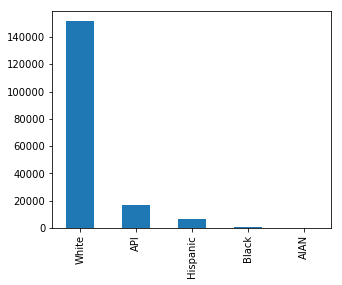

In [137]:
df.ethnicity.value_counts().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(5,4)
plt.show()

## Visualizing all Professor's Nationality Distribution by States:

In [280]:
import plotly.plotly as py
plotly.tools.set_credentials_file(username='alok123t', api_key='IpIxJXX4qXVHREi5Z74j')

In [145]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

'''df1['text'] = df1['state'] + '<br>' +\
    'Beef '+df1['beef']+' Dairy '+df1['dairy']+'<br>'+\
    'Fruits '+df1['total fruits']+' Veggies ' + df1['total veggies']+'<br>'+\
    'Wheat '+df1['wheat']+' Corn '+df1['corn']'''


l1 = list(statewise_nationalities.columns)
count1 = []
for i in l1:
    count1.append(statewise_nationalities.shape[0]-statewise_nationalities[i].isnull().sum())
    
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = list(statewise_ethnicities.columns),
        z = count1,
        zmax = 32,
        zmin = 0,
        locationmode = 'USA-states',
        text = 'Distinct nationalities represented by Professors.',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Nationalities count")
        ) ]

layout = dict(
        title = 'Nationality Density Distribution by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

## Visualizing CS Department's Professor Nationality Distribution by States:

In [140]:
overall_cs_dataset = df.loc[df['tDept'] == 'Computer Science']

In [144]:
import plotly.plotly as py
import pandas as pd


statewise_nationalities_cs = pd.DataFrame(index=overall_cs_dataset.nationality.unique())
states_list_cs = list(overall_cs_dataset.states.unique())
for i in states_list_cs:
    state_data_cs = overall_cs_dataset[overall_cs_dataset['states']==i]
    statewise_nationalities_cs[i] = state_data_cs.nationality.value_counts()
    

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

l1 = list(statewise_nationalities_cs.columns)
count2 = []
for i in l1:
    count2.append(statewise_nationalities_cs.shape[0]-statewise_nationalities_cs[i].isnull().sum())
    
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = list(statewise_ethnicities.columns),
        z = count2,
        zmax = 32,
        zmin = 0,
        locationmode = 'USA-states',
        text = 'Distinct nationalities represented by Professors.',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )),
        colorbar = dict(
            title = "Nationalities count")
        ) ]

layout = dict(
        title = 'Nationality Density Distribution by State (Computer Science)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout ) 
py.iplot( fig, filename='d3-cloropleth-map' )

In [142]:
overall_english_dataset = df.loc[df['tDept'] == 'English']

In [146]:
import plotly.plotly as py
import pandas as pd


statewise_nationalities_english = pd.DataFrame(index=overall_english_dataset.nationality.unique())
states_list_english = list(overall_english_dataset.states.unique())
for i in states_list_english:
    state_data_english = overall_english_dataset[overall_english_dataset['states']==i]
    statewise_nationalities_english[i] = state_data_english.nationality.value_counts()
    

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

l1 = list(statewise_nationalities_english.columns)
count3 = []
for i in l1:
    count3.append(statewise_nationalities_english.shape[0]-statewise_nationalities_english[i].isnull().sum())
    
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = list(statewise_ethnicities.columns),
        z = count3,
        zmax = 32,
        zmin = 0,
        locationmode = 'USA-states',
        text = 'Distinct nationalities represented by Professors.',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )),
        colorbar = dict(
            title = "Nationalities count")
        ) ]

layout = dict(
        title = 'Nationality Density Distribution by State (English)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [304]:
#Stony Brook University (SUNY)
uname = 'Stony Brook University (SUNY)'
sbu = df[df['institution_name'] == uname]

sbu1 = pd.DataFrame(sbu.tDept.value_counts()).reset_index()
sbu1.rename(columns={'index': 'dept', 'tDept': 'faculty'}, inplace=True)

departments = sbu1.dept.unique()
natCount = [sbu[sbu['tDept'] == dept].nationality.nunique() for dept in departments]
sbu1['nationality_count'] = natCount

ethCount = [sbu[sbu['tDept'] == dept].ethnicity.nunique() for dept in departments]
sbu1['ethnicity_count'] = ethCount

In [305]:
largest5_depts = list(sbu1.dept[:5])
labels = []
values = []
for i in range(len(largest5_depts)):
    lang = largest5_depts[i]
    l = sbu[sbu['tDept'] == lang].nationality
    sz = l.size
    norm_l = l.value_counts().apply(lambda x: x/sz)
    labels_l = norm_l.keys().tolist()
    labels_l = [labels_l[x] if (x < 2) else '' for x in range(len(labels_l))]
    labels.append(labels_l)
    values.append(norm_l.values.tolist())



trace = go.Pie(labels=labels[0], values=values[0])

py.iplot([trace], filename='basic_pie_chart')

In [306]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x=list(sbu1.dept[:15]),
    y=list(sbu1.faculty[:15]),
    mode='markers',
    marker=dict(
        size=2*(sbu1.nationality_count[:15]),
        
    )
)


trace1 = go.Scatter(
    x=list(sbu1.dept[:15]),
    y=list(sbu1.faculty[:15]),
    mode='markers',
    marker=dict(
        size=6*(sbu1.ethnicity_count[:15]),
        
    )
)



trace2 = go.Scatter(
    x=list(sbu1.dept[:15]),
    y=list(sbu1.faculty[:15]),
    mode='markers',
    marker=dict(
        size=6*(sbu1.ethnicity_count[:15]),
        
    )
)

fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], subplot_titles=('Nationality','Ethnicity'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
#fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=False, title=uname)
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



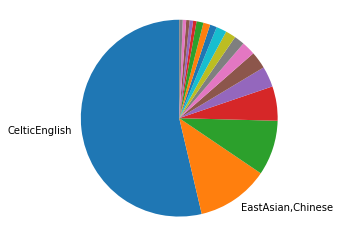

In [303]:
import matplotlib.pyplot as plt
 

plt.pie(values[0], labels=labels[0],startangle=90)
plt.axis('equal')
plt.show()

In [18]:
data = pd.read_csv('Faculty.csv')

In [59]:
pu = data[data['institution_name'] == 'Stony Brook University (SUNY)']
pu.NationalityLabel1

169831           Hispanic,Portuguese
169832                 CelticEnglish
169833               European,French
169834                 Muslim,Nubian
169835                 Muslim,Nubian
169836           African,EastAfrican
169837                 Muslim,Nubian
169838           Hispanic,Portuguese
169839                 CelticEnglish
169840                 CelticEnglish
169841                 CelticEnglish
169842                 CelticEnglish
169843               European,German
169844                 CelticEnglish
169845                 CelticEnglish
169846                    SouthAsian
169847                 CelticEnglish
169848                 Muslim,Nubian
169849                Nordic,Finland
169850              Hispanic,Spanish
169851    Nordic,Scandinavian,Sweden
169852                    SouthAsian
169853    Muslim,Pakistanis,Pakistan
169854         EastAsian,South Korea
169855         EastAsian,South Korea
169856              Hispanic,Spanish
169857          Muslim,Turkic,Turkey
1

In [66]:
d = pu.NationalityLabel1.value_counts().to_dict()
s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
s = s[:9]
l = []
for i in range(len(s)):
    l.append(s[i][0])
print(l)

new = pu['NationalityLabel1'].apply(lambda i: i if i in l else 'others')
pu66 = pd.crosstab(pu.tDept,new).reset_index()
pu66

['CelticEnglish', 'European,German', 'EastAsian,Chinese', 'Hispanic,Spanish', 'European,French', 'SouthAsian', 'European,Italian,Italy', 'Hispanic,Portuguese', 'European,Russian']


NationalityLabel1,tDept,CelticEnglish,"EastAsian,Chinese","European,French","European,German","European,Italian,Italy","European,Russian","Hispanic,Portuguese","Hispanic,Spanish",SouthAsian,others
0,Adapted Aquatics,1,0,1,2,0,0,0,0,0,0
1,African Studies,10,0,0,0,0,0,0,2,1,8
2,Anatomy,1,0,0,1,0,0,0,0,0,0
3,Anthropology,26,1,3,5,1,0,0,1,0,3
4,Applied Mathematics,22,33,2,5,2,5,1,5,5,12
5,Art,50,1,6,11,0,0,2,3,0,8
6,Art & Design,0,0,0,0,1,0,0,0,0,0
7,Art History,1,0,0,0,0,0,0,0,0,0
8,Asian Studies,1,1,0,1,0,0,0,1,3,4
9,Atmospheric Oceanic Sciences,2,0,0,0,0,0,0,0,0,0


In [64]:
pu66

NationalityLabel1,tDept,CelticEnglish,"EastAsian,Chinese","European,French","European,German","European,Italian,Italy","European,Russian","Hispanic,Portuguese","Hispanic,Spanish",SouthAsian,others
0,Adapted Aquatics,1,0,1,2,0,0,0,0,0,0
1,African Studies,10,0,0,0,0,0,0,2,1,8
2,Anatomy,1,0,0,1,0,0,0,0,0,0
3,Anthropology,26,1,3,5,1,0,0,1,0,3
4,Applied Mathematics,22,33,2,5,2,5,1,5,5,12
5,Art,50,1,6,11,0,0,2,3,0,8
6,Art & Design,0,0,0,0,1,0,0,0,0,0
7,Art History,1,0,0,0,0,0,0,0,0,0
8,Asian Studies,1,1,0,1,0,0,0,1,3,4
9,Atmospheric Oceanic Sciences,2,0,0,0,0,0,0,0,0,0


In [14]:
df_new

0         a
1         a
2         b
3    others
Name: foo, dtype: object